In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("Salary_dataset.csv")

In [9]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [11]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'Salary')

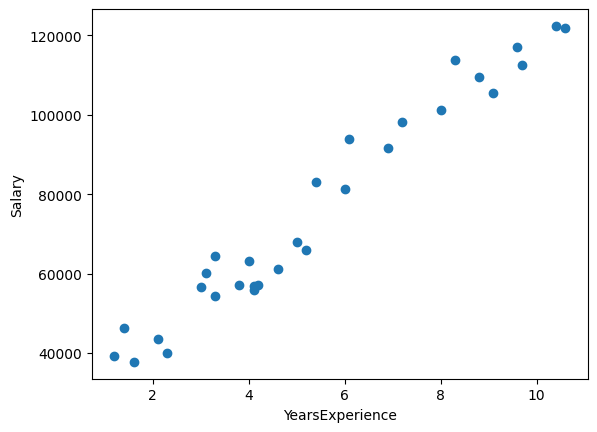

In [17]:
#scatter plot -> to check the replationshiop between my dependent and independent feature
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [19]:
#correlation -> inside corr()  pearson correlation is used
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


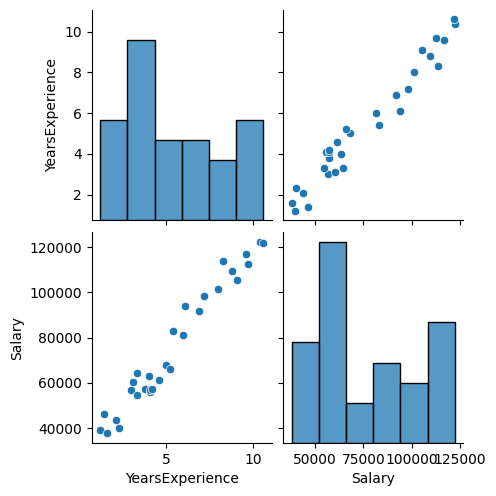

In [20]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [25]:
## Independent and Dependent feature
X = df[['YearsExperience']]  ###independent features should be dataframe or 2 dimensional array
type(X)
##if i used only one bracket []  it will become series

pandas.core.frame.DataFrame

In [28]:
##in the case of dependent feature i can have a series or 1 dimension array
y = df['Salary']
type(y)

pandas.core.series.Series

In [29]:
## Train test split -> to check overfitting under fitting condition
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
X_train.shape

(22, 1)

In [34]:
#Standardization -> if X(kg) y(cm) --- Apply Zscore All data will be converted to mean = 0 standard deviation = 1
## Here i'm standardizing my input feature not output feature
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()  # i.e, scaler = (xi-mean)/standard deviation 
X_train = scaler.fit_transform(X_train)

In [42]:
#Same thing we do for test data also
#here i will write transform i.e, i'm going to use training data set mean and standard deviation use it herei 
# We do this bcz of data leakage i don't want training data know anything about test data
X_test = scaler.transform(X_test)

C:\Users\Darshit joshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
X_test

array([[-3.47922644],
       [-3.74679423],
       [-3.55892749],
       [-3.72402251],
       [-3.84357408],
       [-3.81510942],
       [-3.43937592],
       [-3.53046283]])

In [46]:
#Apply Simple linear regression
from sklearn.linear_model import LinearRegression

In [49]:
regression = LinearRegression(n_jobs = -1)

In [50]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [56]:
## htheta(x)= theta0 + theta1(x) equation
print("Coefficient or slope:",regression.coef_) #theta1
print("Intercept:",regression.intercept_) #theta0

Coefficient or slope: [25063.1519945]
Intercept: 70417.40909090909


 Above line saying that 1 unit movement in YearExperience value that leads to 25063 unit movement in salary value
 70417 says that when your YearExperience value is 0 At whagt ppint your line is meeting the y-axis 

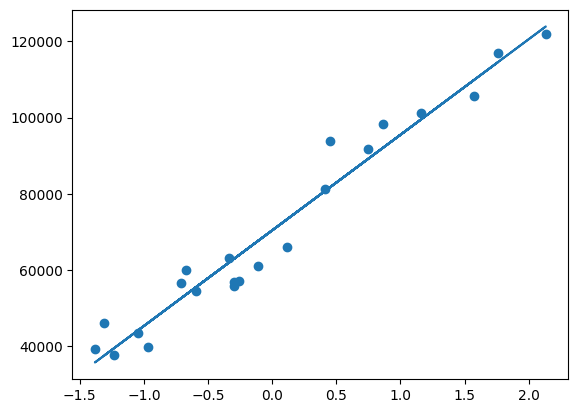

In [61]:
# plot best fit line with training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
##this best fit line will have slope and intercept of 25063.1519945, 70417.40909090909

## Prediction for test data
1. predicted salary output = intercept + coef_(YearsExpereince)
2. y_pred_test = 70417 + 25063.1519945(X_test)

In [65]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [68]:
# Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

13028626999.784943
112234.39257488516
114143.01117363665


## R square
formula
R^2 = 1 - SSR/SST

In [72]:
from sklearn.metrics import r2_score

In [74]:
score = r2_score(y_test,y_pred)
print(score)

-20.918530425568363


## Adjusted R Square

In [77]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-24.57161882982976

In [86]:
## Prediction for new data
regression.predict(scaler.transform([[3]]))

C:\Users\Darshit joshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([33417.89077159])

the person who has 3 yearofExperience will have salary = 33417